<a href="https://colab.research.google.com/github/Somesh098/project-heart-/blob/main/project_final_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("/content/Heart_Prediction data set.csv")

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Summary statistics for numerical features
print("\nDescriptive statistics:")
print(df.describe())

# Encode categorical variables if any exist
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = pd.factorize(df[col])[0]

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)


First five rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   66   M           NAP        116          100          0         ST    122   
1   41   M           ATA        117          239          0         ST    148   
2   32   M           ASY        118          100          1     Normal    135   
3   51   F           ATA        115          400          0     Normal    140   
4   56   M           NAP        152          123          1     Normal    174   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.6       Up             0  
1              N      2.0       Up             0  
2              Y      1.2     Flat             1  
3              N      0.0       Up             0  
4              N      0.2       Up             0  

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
Max

# Exploratory Data analysis

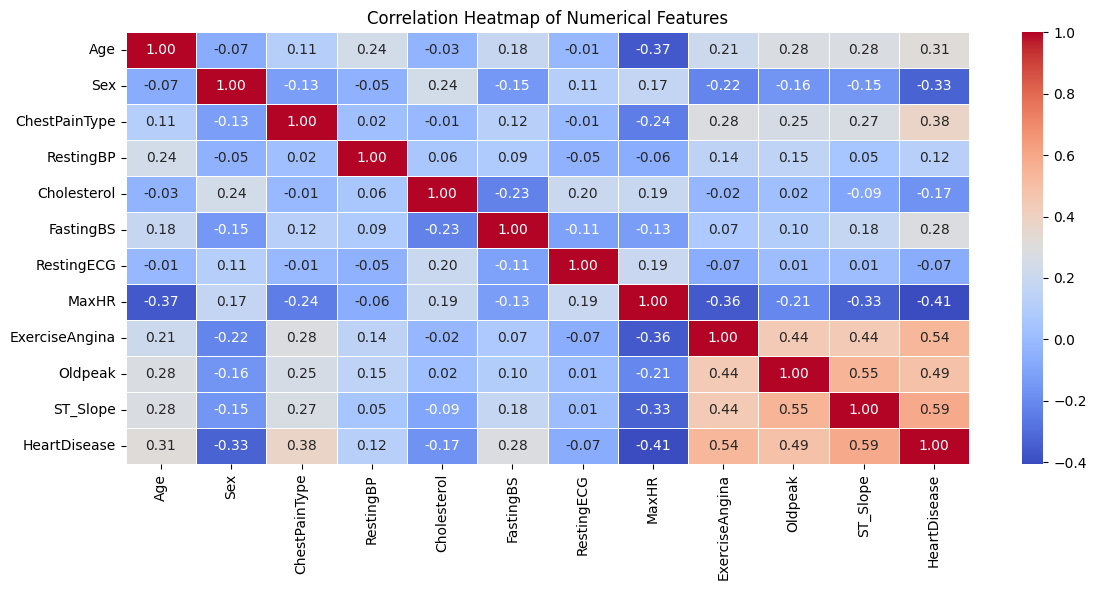

In [2]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


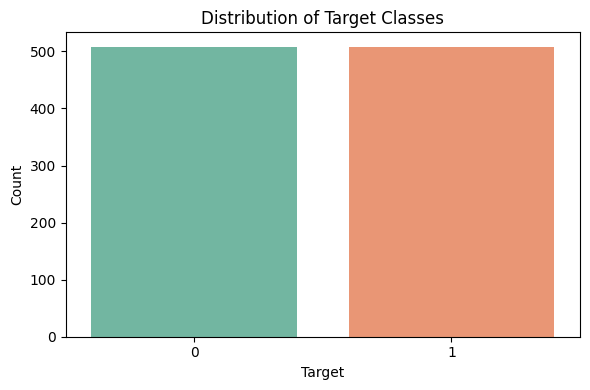

In [5]:
# Distribution of the target variable
target_col = 'target' if 'target' in df.columns else df.columns[-1]

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target_col, palette='Set2')
plt.title("Distribution of Target Classes")
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


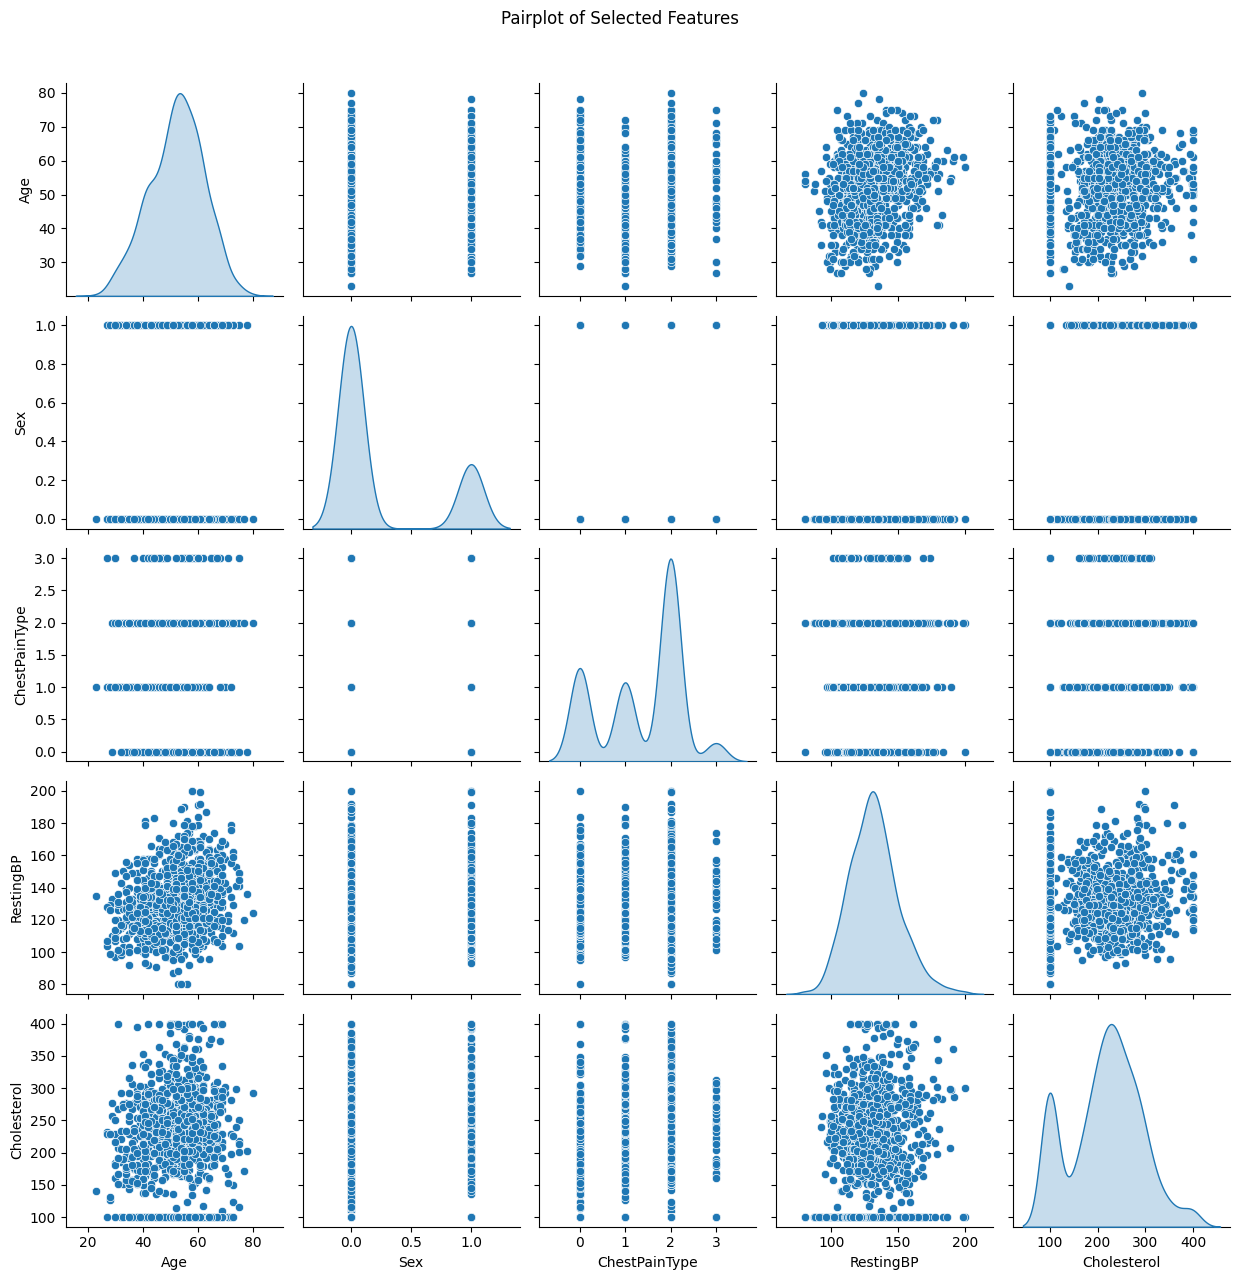

In [6]:
# Pairplot for the first five numerical features (for visualizing relationships)
sns.pairplot(df.iloc[:, :5], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.tight_layout()
plt.show()


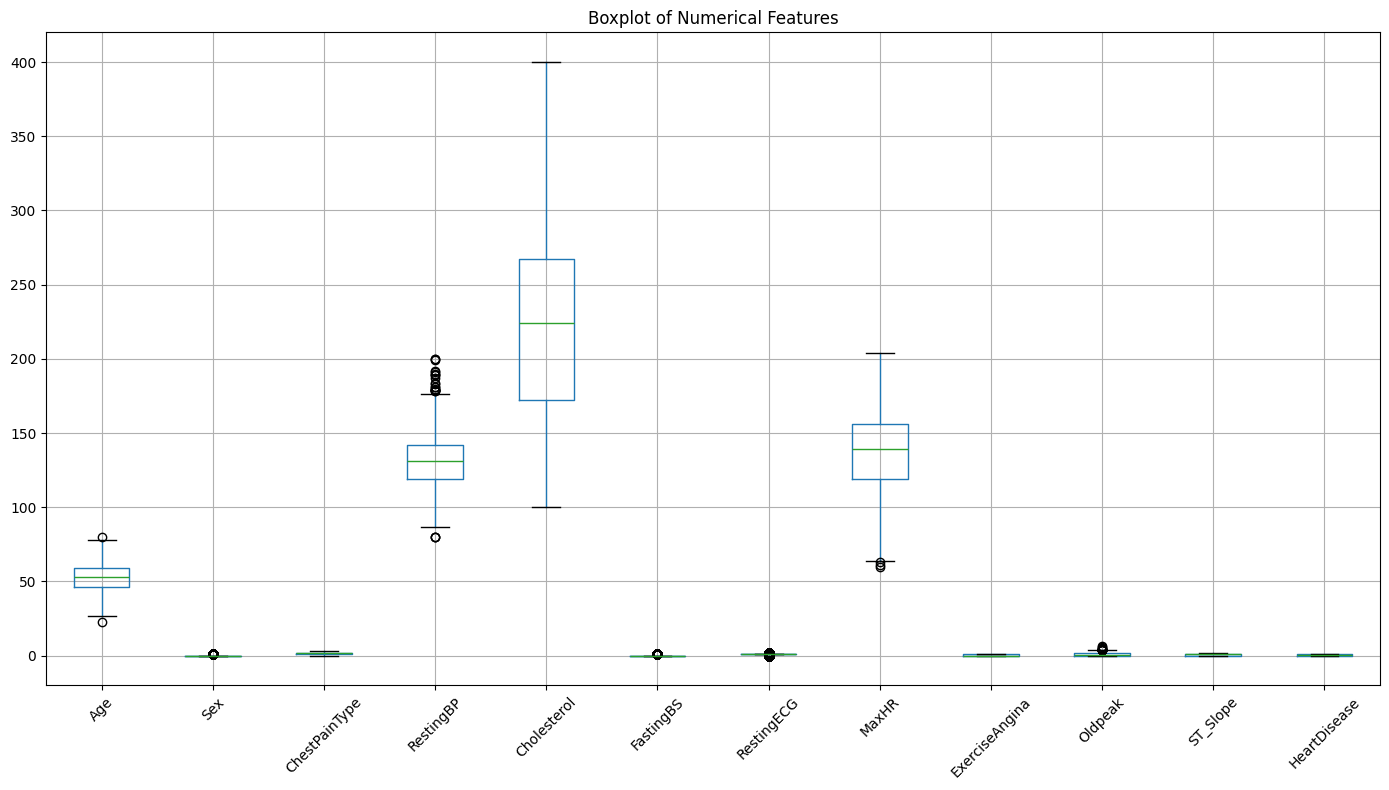

In [7]:
# Boxplots to observe distribution and potential outliers in numerical features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Import model-related libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       106
           1       0.89      0.87      0.88        98

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204



In [10]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       106
           1       0.93      0.87      0.90        98

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204



In [11]:
# Define ANN architecture
ann_model = Sequential()
ann_model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate on test set
ann_predictions = (ann_model.predict(X_test) > 0.5).astype("int32")

print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       106
           1       0.91      0.85      0.88        98

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

